In [42]:

# The next three imports help with compatability between
# Python 2 and 3
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import numpy as np
import pylab
import tensorflow as tf

# A special command for IPython Notebooks that
# intructs Matplotlib to display plots in the notebook
%matplotlib inline

In [43]:
# This is a directory we'll use to store information
# about the graph to later visualize in TensorBoard.
# By default, it will be created in the same directory
# as this notebook. 

LOGDIR = './graphs/tutorial'

In [44]:
#reset the graph and session
tf.reset_default_graph()
sess = tf.Session()

In [45]:
#This function will create a noisy dataset that's roughly linear, according to the equation y = mx + b + noise


def make_noisy_data():
    m = 0.1
    b=0.2
    n=100
    x= np.random.rand(n)
    noise = np.random.normal(scale=0.01, size=len(x))
    y= np.multiply(m,x) + b + noise
    return x, y

In [46]:
#Step 1) Create training and testing data from the above function

x_train, y_train = make_noisy_data()
x_test, y_test = make_noisy_data()
print(x_train.shape)

(100,)


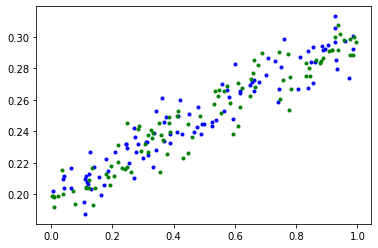

In [47]:
pylab.plot(x_train, y_train, 'b.')
pylab.plot(x_test, y_test, 'g.')

In [48]:
#Step 2) Define placeholders for data we'll later input to the graph.

# tf.name_scope is used to make a graph legible in the TensorBoard graph explorer
# shape=[None] means x_placeholder is a one dimensional array of any length. 
# name='x' gives TensorBoard a display name for this node.
with tf.name_scope('input'):
    x_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='x-input')
    y_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='y-input')

In [49]:
print(x_placeholder)
print(y_placeholder)
#shape will be ? as it can take an shape

Tensor("input/x-input:0", shape=(?,), dtype=float32)
Tensor("input/y-input:0", shape=(?,), dtype=float32)


Step 3) Define our model.

Here, we'll use a linear model: y = mx + b

In [52]:
with tf.name_scope('model'):
    m = tf.Variable(tf.random_normal([1]), name='m')
    b = tf.Variable(tf.random_normal([1]), name='b')
    # This is the same as y = tf.add(tf.mul(m, x_placeholder), b), but looks nicer
    y = m * x_placeholder + b

In [53]:
LEARNING_RATE = 0.5
with tf.name_scope('training'):
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.square(y - y_placeholder))
    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
        train = optimizer.minimize(loss)

In [54]:
print("loss:", loss)
print("optimizer:", optimizer)
print("train_step:", train)

loss: Tensor("training_1/loss/Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x000002799AAA9D68>
train_step: name: "training_1/optimiser/GradientDescent"
op: "NoOp"
input: "^training_1/optimiser/GradientDescent/update_model/m/ApplyGradientDescent"
input: "^training_1/optimiser/GradientDescent/update_model/b/ApplyGradientDescent"
input: "^training_1/optimiser/GradientDescent/update_model_1/m/ApplyGradientDescent"
input: "^training_1/optimiser/GradientDescent/update_model_1/b/ApplyGradientDescent"



In [55]:
writer = tf.summary.FileWriter(LOGDIR)
writer.add_graph(sess.graph)

# Attach summaries to Tensors (for TensorBoard visualization)
tf.summary.histogram('m', m)
tf.summary.histogram('b', b)
tf.summary.scalar('loss', loss)

# This op will calculate our summary data when run
summary_op = tf.summary.merge_all()

In [56]:

sess.run(tf.global_variables_initializer())

In [57]:

TRAIN_STEPS = 201

for step in range(TRAIN_STEPS):
    
    # Session will run two ops:
    # - summary_op prepares summary data we'll write to disk in a moment
    # - train will use the optimizer to adjust our variables to reduce loss
    summary_result, _ = sess.run([summary_op, train], 
                                  feed_dict={x_placeholder: x_train, 
                                             y_placeholder: y_train})
    # write the summary data to disk
    writer.add_summary(summary_result, step)
    
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([m,b]))
    
# close the writer when we're finished using it
writer.close()

0 [array([-0.7085589], dtype=float32), array([0.5027008], dtype=float32)]
20 [array([-0.09694891], dtype=float32), array([0.30255657], dtype=float32)]
40 [array([0.04986652], dtype=float32), array([0.22666821], dtype=float32)]
60 [array([0.08806425], dtype=float32), array([0.20692393], dtype=float32)]
80 [array([0.09800234], dtype=float32), array([0.20178698], dtype=float32)]
100 [array([0.10058798], dtype=float32), array([0.20045048], dtype=float32)]
120 [array([0.10126071], dtype=float32), array([0.20010275], dtype=float32)]
140 [array([0.10143573], dtype=float32), array([0.20001227], dtype=float32)]
160 [array([0.10148129], dtype=float32), array([0.19998872], dtype=float32)]
180 [array([0.10149312], dtype=float32), array([0.19998261], dtype=float32)]
200 [array([0.1014962], dtype=float32), array([0.19998102], dtype=float32)]


In [58]:
print ("m: %f, b: %f" % (sess.run(m), sess.run(b)))

m: 0.101496, b: 0.199981


In [59]:
sess.run(y, feed_dict={x_placeholder: [2]})

array([0.4029734], dtype=float32)